In [2]:
#Import all necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA #For dimensionality reduction
from sklearn.model_selection import train_test_split #To split data into various validation/training/test sets

%matplotlib inline

#Ignore those pesky warnings
import warnings
warnings.filterwarnings('ignore')

#Load in data from files
dir_path = 'drive/MyDrive/Georgia Tech/Classes/Spring 2022/ECE 6254: Statistical Machine Learning/Final Project/skin_cancer_dataset_2/'
folder_benign_train = dir_path + 'train/benign'
folder_malignant_train = dir_path + 'train/malignant'

folder_benign_test = dir_path + 'test/benign'
folder_malignant_test = dir_path + 'test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
x_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
x_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
x_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
x_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(x_benign.shape[0])
y_malignant = np.ones(x_malignant.shape[0])
y_benign_test = np.zeros(x_benign_test.shape[0])
y_malignant_test = np.ones(x_malignant_test.shape[0])

# Merge data 
x_train = np.concatenate((x_benign, x_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)
x_test = np.concatenate((x_benign_test, x_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(x_train.shape[0])
np.random.shuffle(s)
x_train = x_train[s]
y_train = y_train[s]

s = np.arange(x_test.shape[0])
np.random.shuffle(s)
x_test = x_test[s]
y_test = y_test[s]

#Check their shape
print("x_train = " + str(x_train.shape))
print("x_test = " + str(x_test.shape))
print("y_train = " + str(y_train.shape))
print("y_test = " + str(y_test.shape))

dataset_dir = 'drive/MyDrive/Georgia Tech/Classes/Spring 2022/ECE 6254: Statistical Machine Learning/Final Project/skin_cancer_dataset_2/'
np.save(dataset_dir + "x_train_2.npy", x_train)
np.save(dataset_dir + "y_train_2.npy", y_train)
np.save(dataset_dir + "x_test_2.npy", x_test)
np.save(dataset_dir + "y_test_2.npy", y_test)

x_train = (2637, 224, 224, 3)
x_test = (660, 224, 224, 3)
y_train = (2637,)
y_test = (660,)


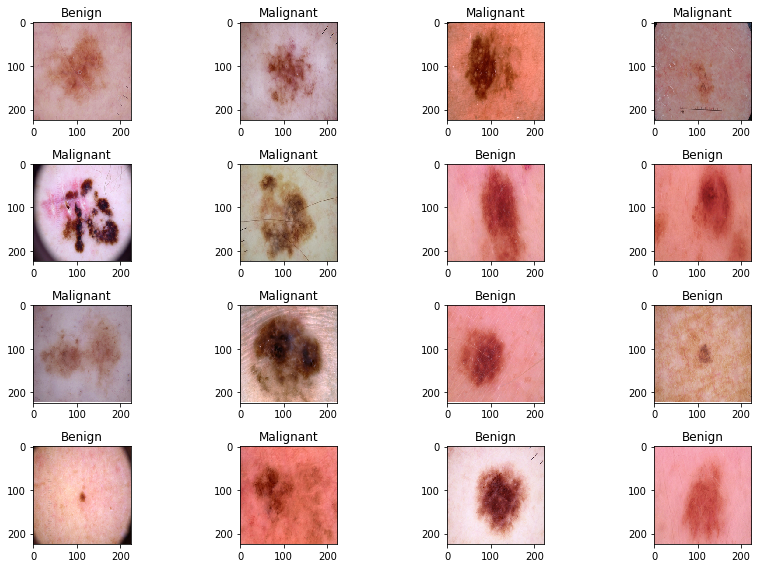

In [11]:
# Display first 15 images of moles, and how they are classified

w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 4
rows = 4

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
fig.tight_layout()
plt.show()

In [6]:
#Flatten the data into a 2D array and reduce the dimensions to a more manageable 500

def do_PCA(x_train,x_test, num_components=50, var_per=0.99, comp_var=1, verbose=0,fit=1,transform=1):

    ''' 
    If comp_car=1
        do component based PCA
    else
        do variance based PCA
    '''

    if(comp_var):
        pca=PCA(n_components=num_components)
        pca.fit(x_train)
        if(fit==1):
            pca_data=pca.transform(x_train)
        if(transform==1):
            pca_data=pca.transform(x_test)
        if(verbose):
            print("PCA explained variance",np.sum(pca.explained_variance_ratio_))
    else:
        '''
            Can can multiple components such that the explained variance increases
            above the given threshold
        '''
    return pca_data

x_train_f = x_train.flatten().reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_f = x_test.flatten().reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

print("Flattened training/test data shape")
print("x_train_f = " + str(x_train_f.shape))
print("x_test_f = " + str(x_test_f.shape))

x_train = do_PCA(x_train_f,x_train_f, num_components=500, var_per=0.99, comp_var=1, verbose=1,fit=1,transform=1)
x_test = do_PCA(x_train_f,x_test_f, num_components=500, var_per=0.99, comp_var=1, verbose=1,fit=0,transform=1)

print("Flattened training/test/validation data shape")
print("x_train = " + str(x_train.shape))
print("x_test = " + str(x_test.shape))

Flattened training/test data shape
x_train_f = (2637, 150528)
x_test_f = (660, 150528)
PCA explained variance 0.9757208411001087
PCA explained variance 0.9757284697402782
Flattened training/test/validation data shape
x_train = (2637, 500)
x_test = (660, 500)


In [7]:
#Split the training set into separate training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=0)

#Check the size of all the final validation, training, and test sets
print("x_train = " + str(x_train.shape))
print("y_train = " + str(y_train.shape))
print("x_val = " + str(x_val.shape))
print("y_val = " + str(y_val.shape))
print("x_test = " + str(x_test.shape))
print("y_test = " + str(y_test.shape))

#Save the sets to files
dataset_dir = 'drive/MyDrive/Georgia Tech/Classes/Spring 2022/ECE 6254: Statistical Machine Learning/Final Project/skin_cancer_dataset_2/'
np.save(dataset_dir + "x_train.npy", x_train)
np.save(dataset_dir + "y_train.npy", y_train)
np.save(dataset_dir + "x_val.npy", x_val)
np.save(dataset_dir + "y_val.npy", y_val)
np.save(dataset_dir + "x_test.npy", x_test)
np.save(dataset_dir + "y_test.npy", y_test)

x_train = (2109, 500)
y_train = (2109,)
x_val = (528, 500)
y_val = (528,)
x_test = (660, 500)
y_test = (660,)
